In [23]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
from mpl_toolkits import mplot3d

## Convert .jpeg to array

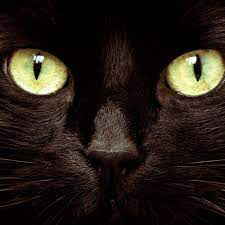

In [24]:
img = Image.open("cat.jpeg")
pix = np.asarray(img)
dim = img.size
img

## Get Average RGB Value

In [25]:
r_list = list()
g_list = list()
b_list = list()
for i in pix:
    for rgb in i:
        r_list.append(rgb[0])
        g_list.append(rgb[1])
        b_list.append(rgb[2])
r_avg = round(sum(r_list)/len(r_list))
g_avg = round(sum(g_list)/len(g_list))
b_avg = round(sum(b_list)/len(b_list))
r_avg, g_avg, b_avg

(37, 28, 22)

## Display Average Color

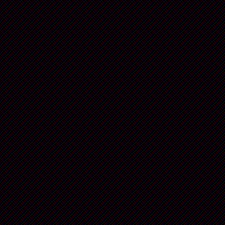

In [26]:
arr_horizontal = [[r_avg, g_avg, b_avg] for i in range(dim[0])]
avg_pix = np.array([arr_horizontal for i in range(dim[1])])
avg_img = Image.fromarray(avg_pix, "RGB")
avg_img

## Get Average Delta

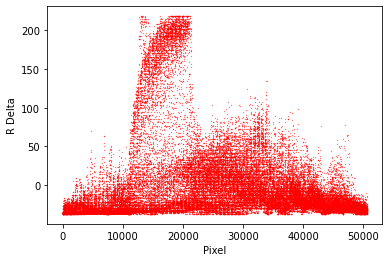

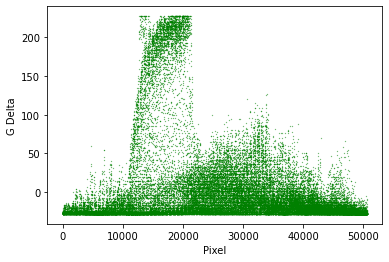

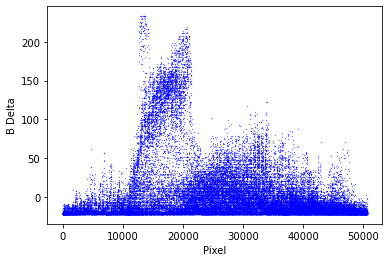

In [27]:
r_delta = list()
g_delta = list()
b_delta = list()
for i in pix:
    for rgb in i:
        r_delta.append(rgb[0]-r_avg)
        g_delta.append(rgb[1]-g_avg)
        b_delta.append(rgb[2]-b_avg)
x_axis = [i for i in range(1, dim[0]*dim[1]+1)]
plt.scatter(x_axis, r_delta, color="red", s=0.05)
plt.xlabel("Pixel")
plt.ylabel("R Delta")
plt.show()
plt.scatter(x_axis, g_delta, color="green", s=0.05)
plt.xlabel("Pixel")
plt.ylabel("G Delta")
plt.show()
plt.scatter(x_axis, b_delta, color="blue", s=0.05)
plt.xlabel("Pixel")
plt.ylabel("B Delta")
plt.show()

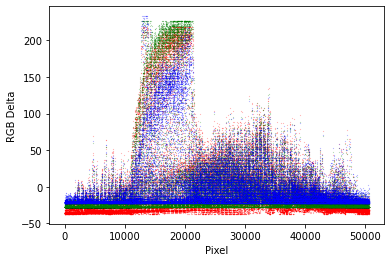

In [28]:
plt.scatter(x_axis, r_delta, color="red", s=0.01)
plt.scatter(x_axis, g_delta, color="green", s=0.01)
plt.scatter(x_axis, b_delta, color="blue", s=0.01)
plt.xlabel("Pixel")
plt.ylabel("RGB Delta")
plt.show()

### From the graph above, certain pixels have high delta values. Grouping algorithm can be applied to normalize pixels in tolerance delta values.

## Tolerance Value Testing

In [29]:
r_tolerance, g_tolerance, b_tolerance = 10, 10, 10

#list of base rgb values
base_rgb_arr = list()

#key: base rgb list
#value: index of pixels that fall under the tolerance of base rgb list
sorted_rgb_dict = dict()

pix_ = pix.tolist()


for i in pix_:
    for rgb in i:
        tolerance_withstandability=False
        #if the base_rgb_arr is empty, append the rgb value
        if len(base_rgb_arr) == 0:
            base_rgb_arr.append(rgb)
            sorted_rgb_dict[str(rgb)] = [[pix_.index(i), i.index(rgb)]]
            i[i.index(rgb)] = ["base"]

        else:
            for k in range(len(base_rgb_arr)):
                #if delta is under tolerance, add index to the corresponding key in sorted_rgb_dict
                if abs(rgb[0] - base_rgb_arr[k][0]) <=r_tolerance and abs(rgb[1] - base_rgb_arr[k][1]) <=g_tolerance and abs(rgb[2] - base_rgb_arr[k][2]) <= b_tolerance:
                    sorted_rgb_dict[str(base_rgb_arr[k])].append([pix_.index(i), i.index(rgb)])
                    tolerance_withstandability=True
                    i[i.index(rgb)] = ["base"]
                    break
            #if delta is not under tolerance, add the rgb value to the base_rgb_arr
            if tolerance_withstandability==False:
                base_rgb_arr.append(rgb)
                sorted_rgb_dict[str(rgb)]=[[pix_.index(i), i.index(rgb)]]
                i[i.index(rgb)] = ["base"]

len(sorted_rgb_dict.keys())

230

In [30]:
overlap_check = set()
for i in sorted_rgb_dict.values():
    for j in i:
        overlap_check.add(str(j))
len(overlap_check) #50625

50625

## Get RGB assigned to Base RGB

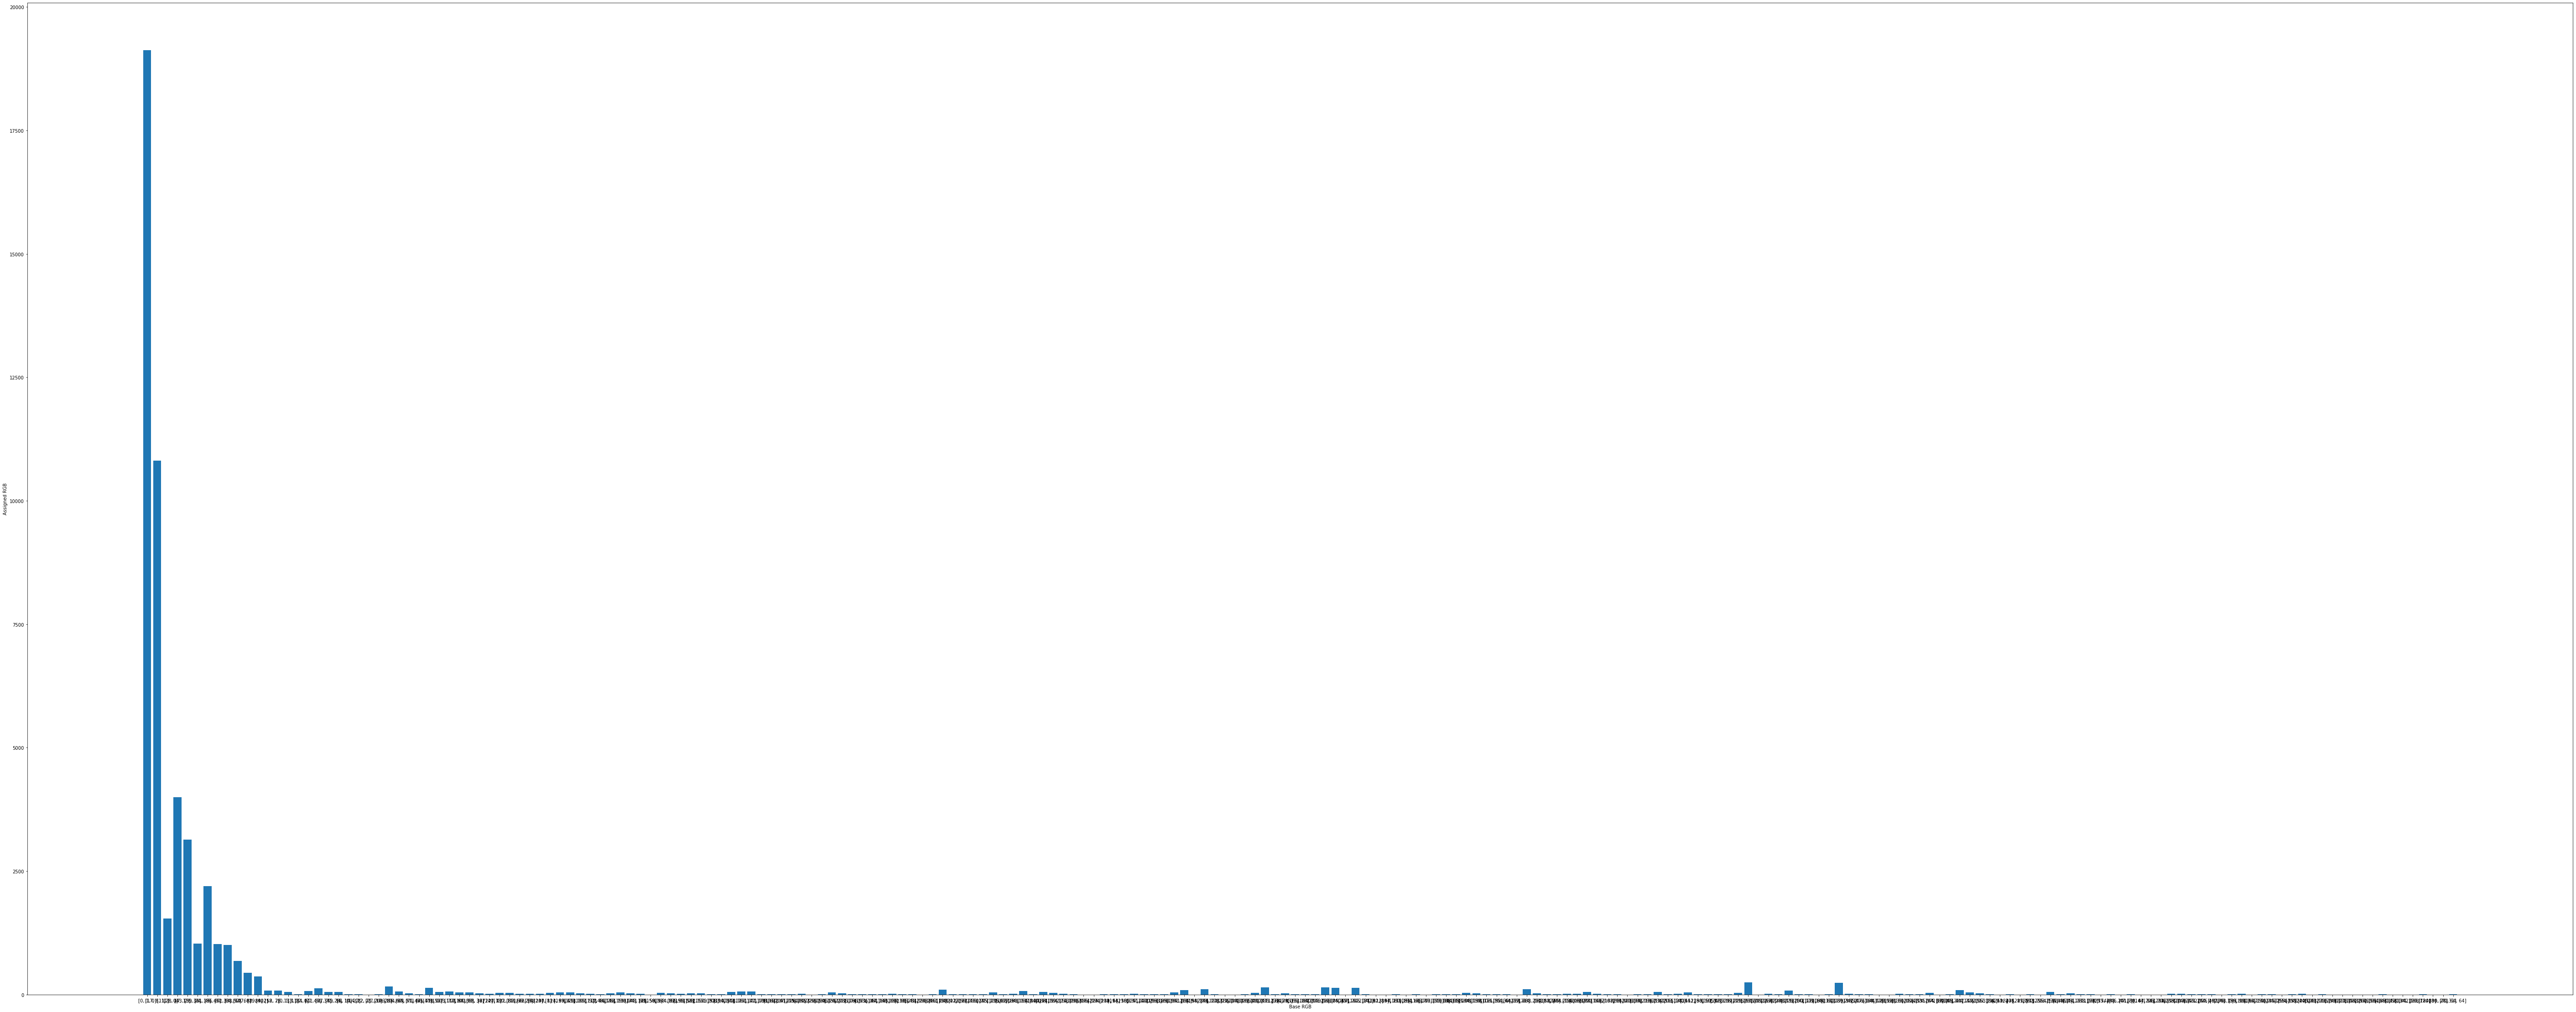

In [31]:
assigned_rgb_num = list()
for i in sorted_rgb_dict.keys():
    assigned_rgb_num.append(len(sorted_rgb_dict[i]))

fig = plt.figure(figsize=(100,40))
x_axis = list(sorted_rgb_dict.keys())
plt.bar(x_axis, assigned_rgb_num)
plt.xlabel("Base RGB")
plt.ylabel("Assigned RGB")
plt.show()

### RGB is concentrated to a few base rgb. Let's try with different tolerance values.

In [32]:
def compress(r_tolerance, g_tolerance, b_tolerance, display=True):
    #list of base rgb values
    base_rgb_arr = list()

    #key: base rgb list
    #value: index of pixels that fall under the tolerance of base rgb list
    sorted_rgb_dict = dict()

    pix_ = pix.tolist()


    for i in pix_:
        for rgb in i:
            tolerance_withstandability=False
            #if the base_rgb_arr is empty, append the rgb value
            if len(base_rgb_arr) == 0:
                base_rgb_arr.append(rgb)
                sorted_rgb_dict[str(rgb)] = [[pix_.index(i), i.index(rgb)]]
                i[i.index(rgb)] = ["base"]

            else:
                for k in range(len(base_rgb_arr)):
                    #if delta is under tolerance, add index to the corresponding key in sorted_rgb_dict
                    if abs(rgb[0] - base_rgb_arr[k][0]) <=r_tolerance and abs(rgb[1] - base_rgb_arr[k][1]) <=g_tolerance and abs(rgb[2] - base_rgb_arr[k][2]) <= b_tolerance:
                        sorted_rgb_dict[str(base_rgb_arr[k])].append([pix_.index(i), i.index(rgb)])
                        tolerance_withstandability=True
                        i[i.index(rgb)] = ["base"]
                        break
                #if delta is not under tolerance, add the rgb value to the base_rgb_arr
                if tolerance_withstandability==False:
                    base_rgb_arr.append(rgb)
                    sorted_rgb_dict[str(rgb)]=[[pix_.index(i), i.index(rgb)]]
                    i[i.index(rgb)] = ["base"]
    
    if display == True:
        assigned_rgb_num = list()
        for i in sorted_rgb_dict.keys():
            assigned_rgb_num.append(len(sorted_rgb_dict[i]))

        fig = plt.figure(figsize=(100,10))
        x_axis = list(sorted_rgb_dict.keys())
        plt.bar(x_axis, assigned_rgb_num)
        plt.xlabel("Base RGB")  
        plt.ylabel("Assigned RGB")
        plt.title(f"Tolerance Val = {r_tolerance}")
        plt.show()
    return sorted_rgb_dict, base_rgb_arr

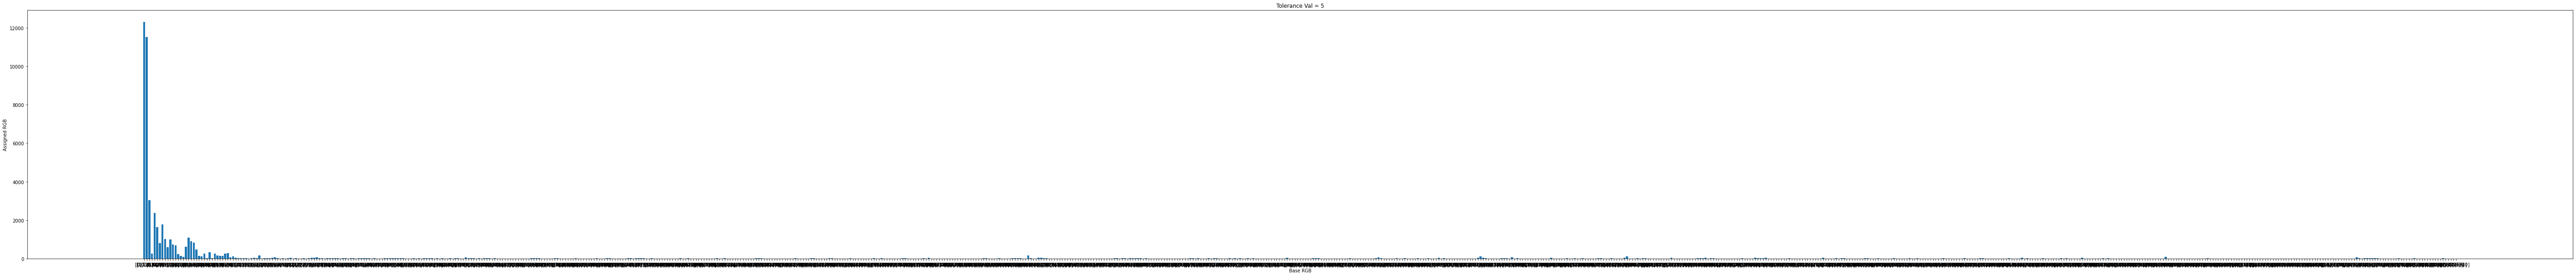

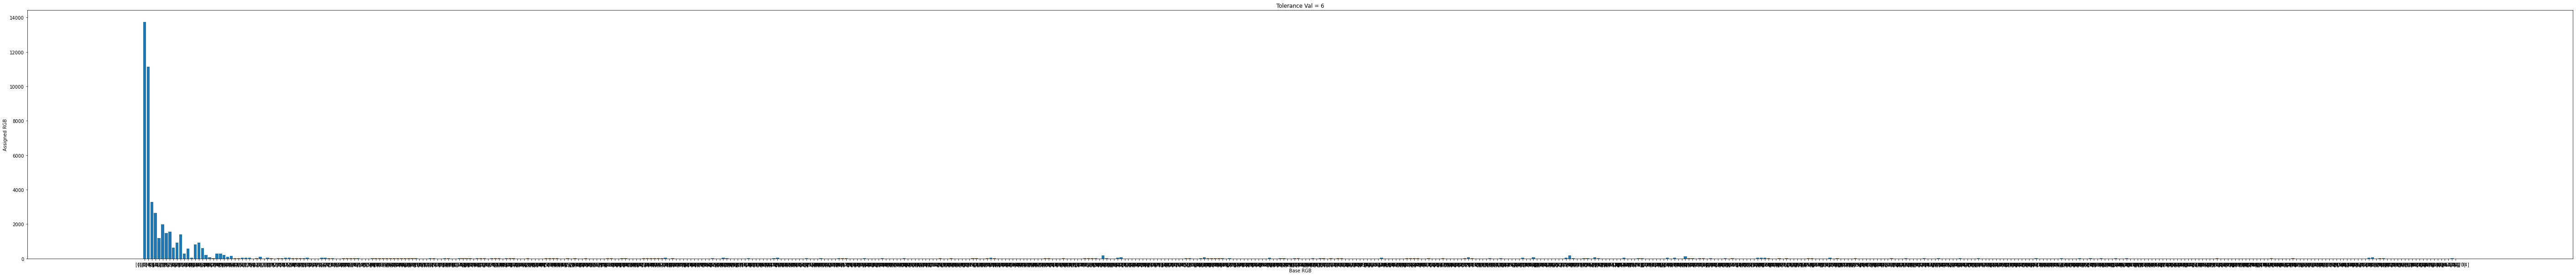

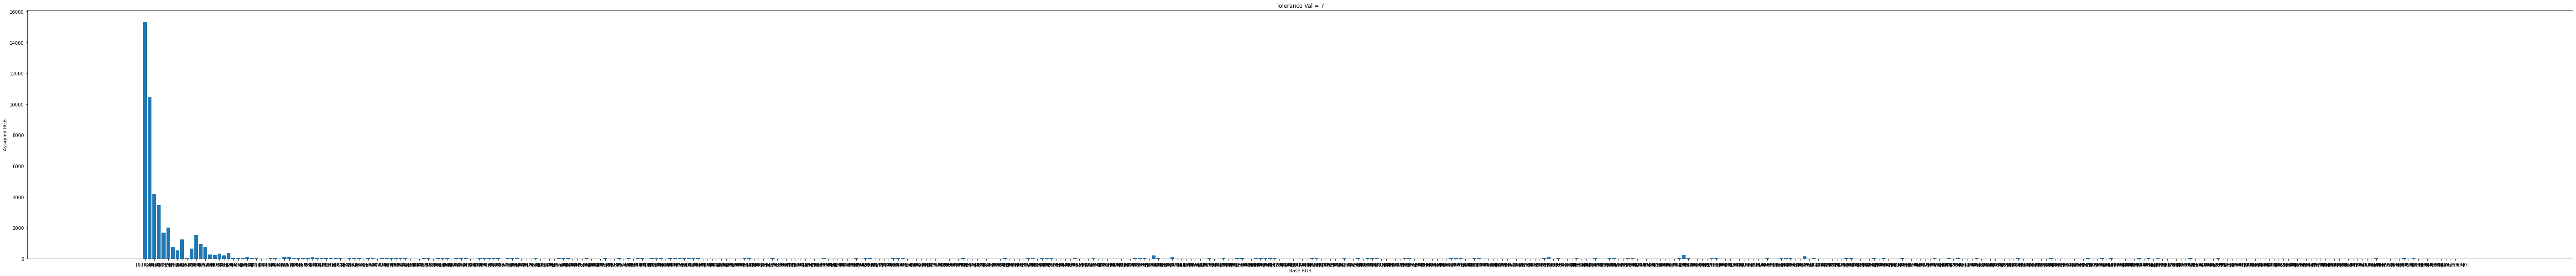

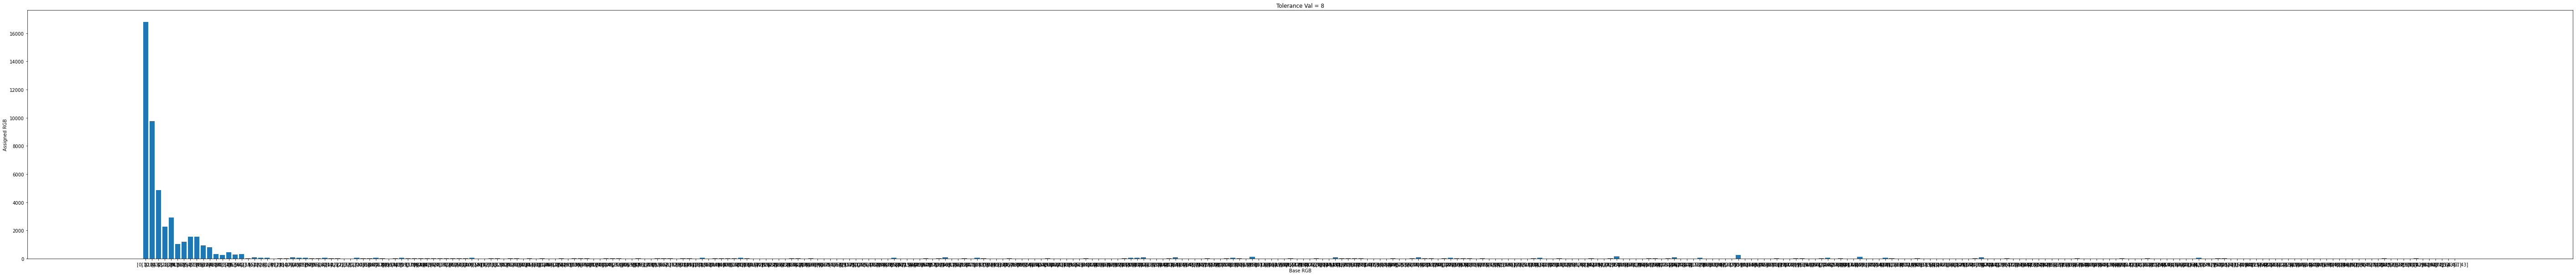

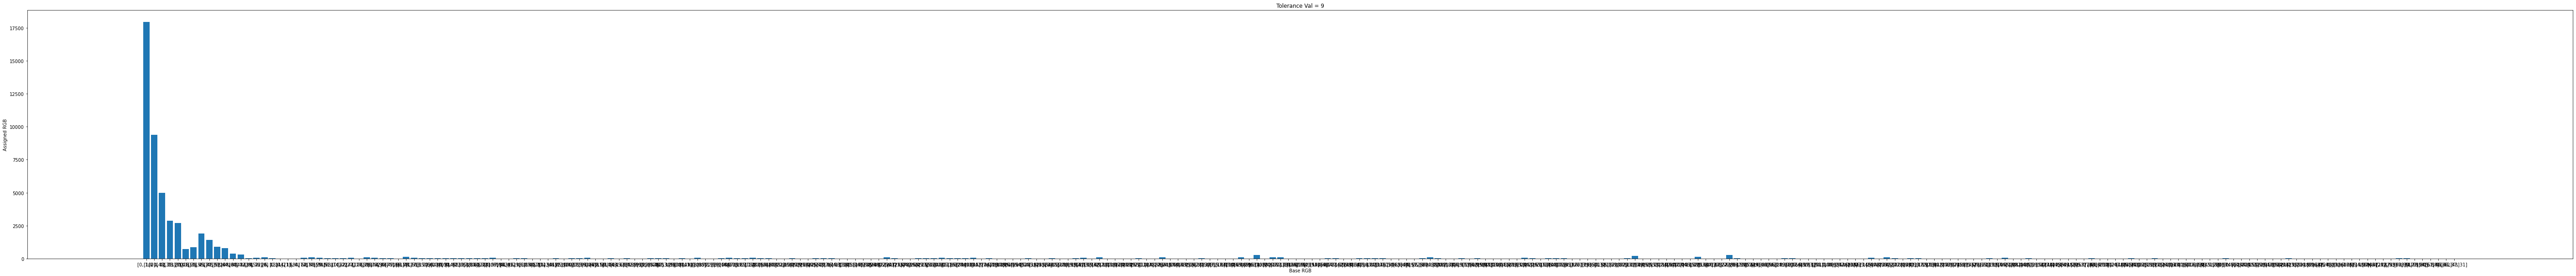

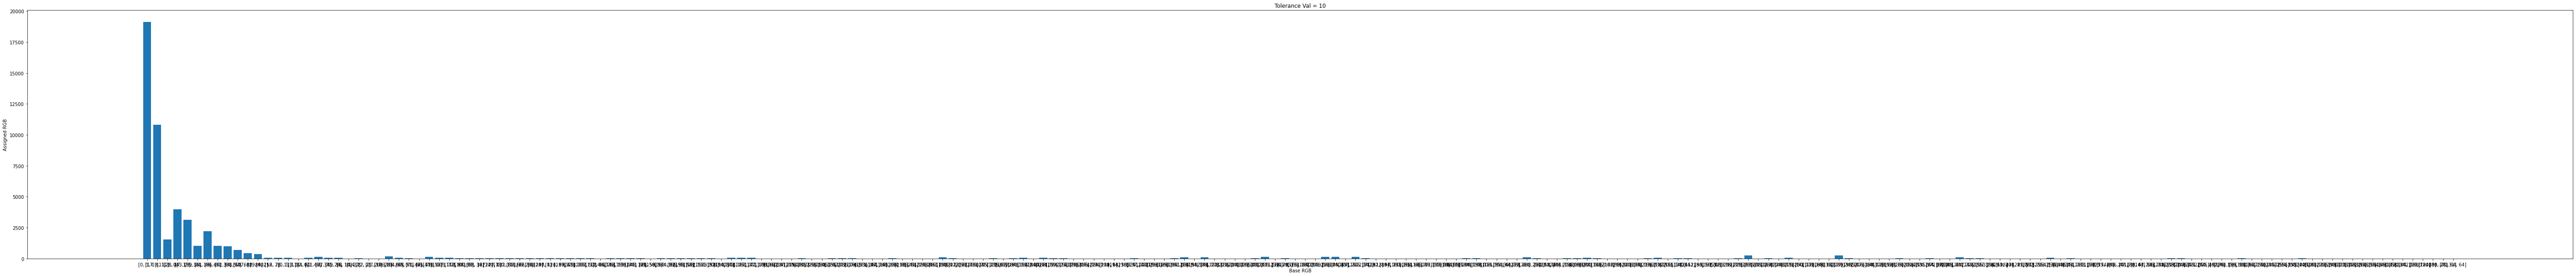

In [33]:
tol = 5
while tol <=10:
    compress(tol, tol, tol, display=True)
    tol+=1

## Try Converting Image to Tolerance Applied Format

In [34]:
tol = 5

while tol <=10:
    sorted_rgb_dict, base_rgb_arr = compress(tol, tol, tol, display=False)
    tolerance_range_index = [i for i in sorted_rgb_dict.values()]
    new_pix = pix.tolist()

    for base in sorted_rgb_dict.keys():
        for i in sorted_rgb_dict[base]:
            new_pix[i[0]][i[1]] = literal_eval(base)


    new_img = Image.fromarray(np.array(new_pix), "RGB")
    new_img.save(f"cat_{tol}.jpeg")
    tol+=1
        

### Algorithm above fails as r, g, b tolerance are equal therefore fails to classify. Most pixels as RGB close to black

## Change Logic (Block Concentration Algorithm)

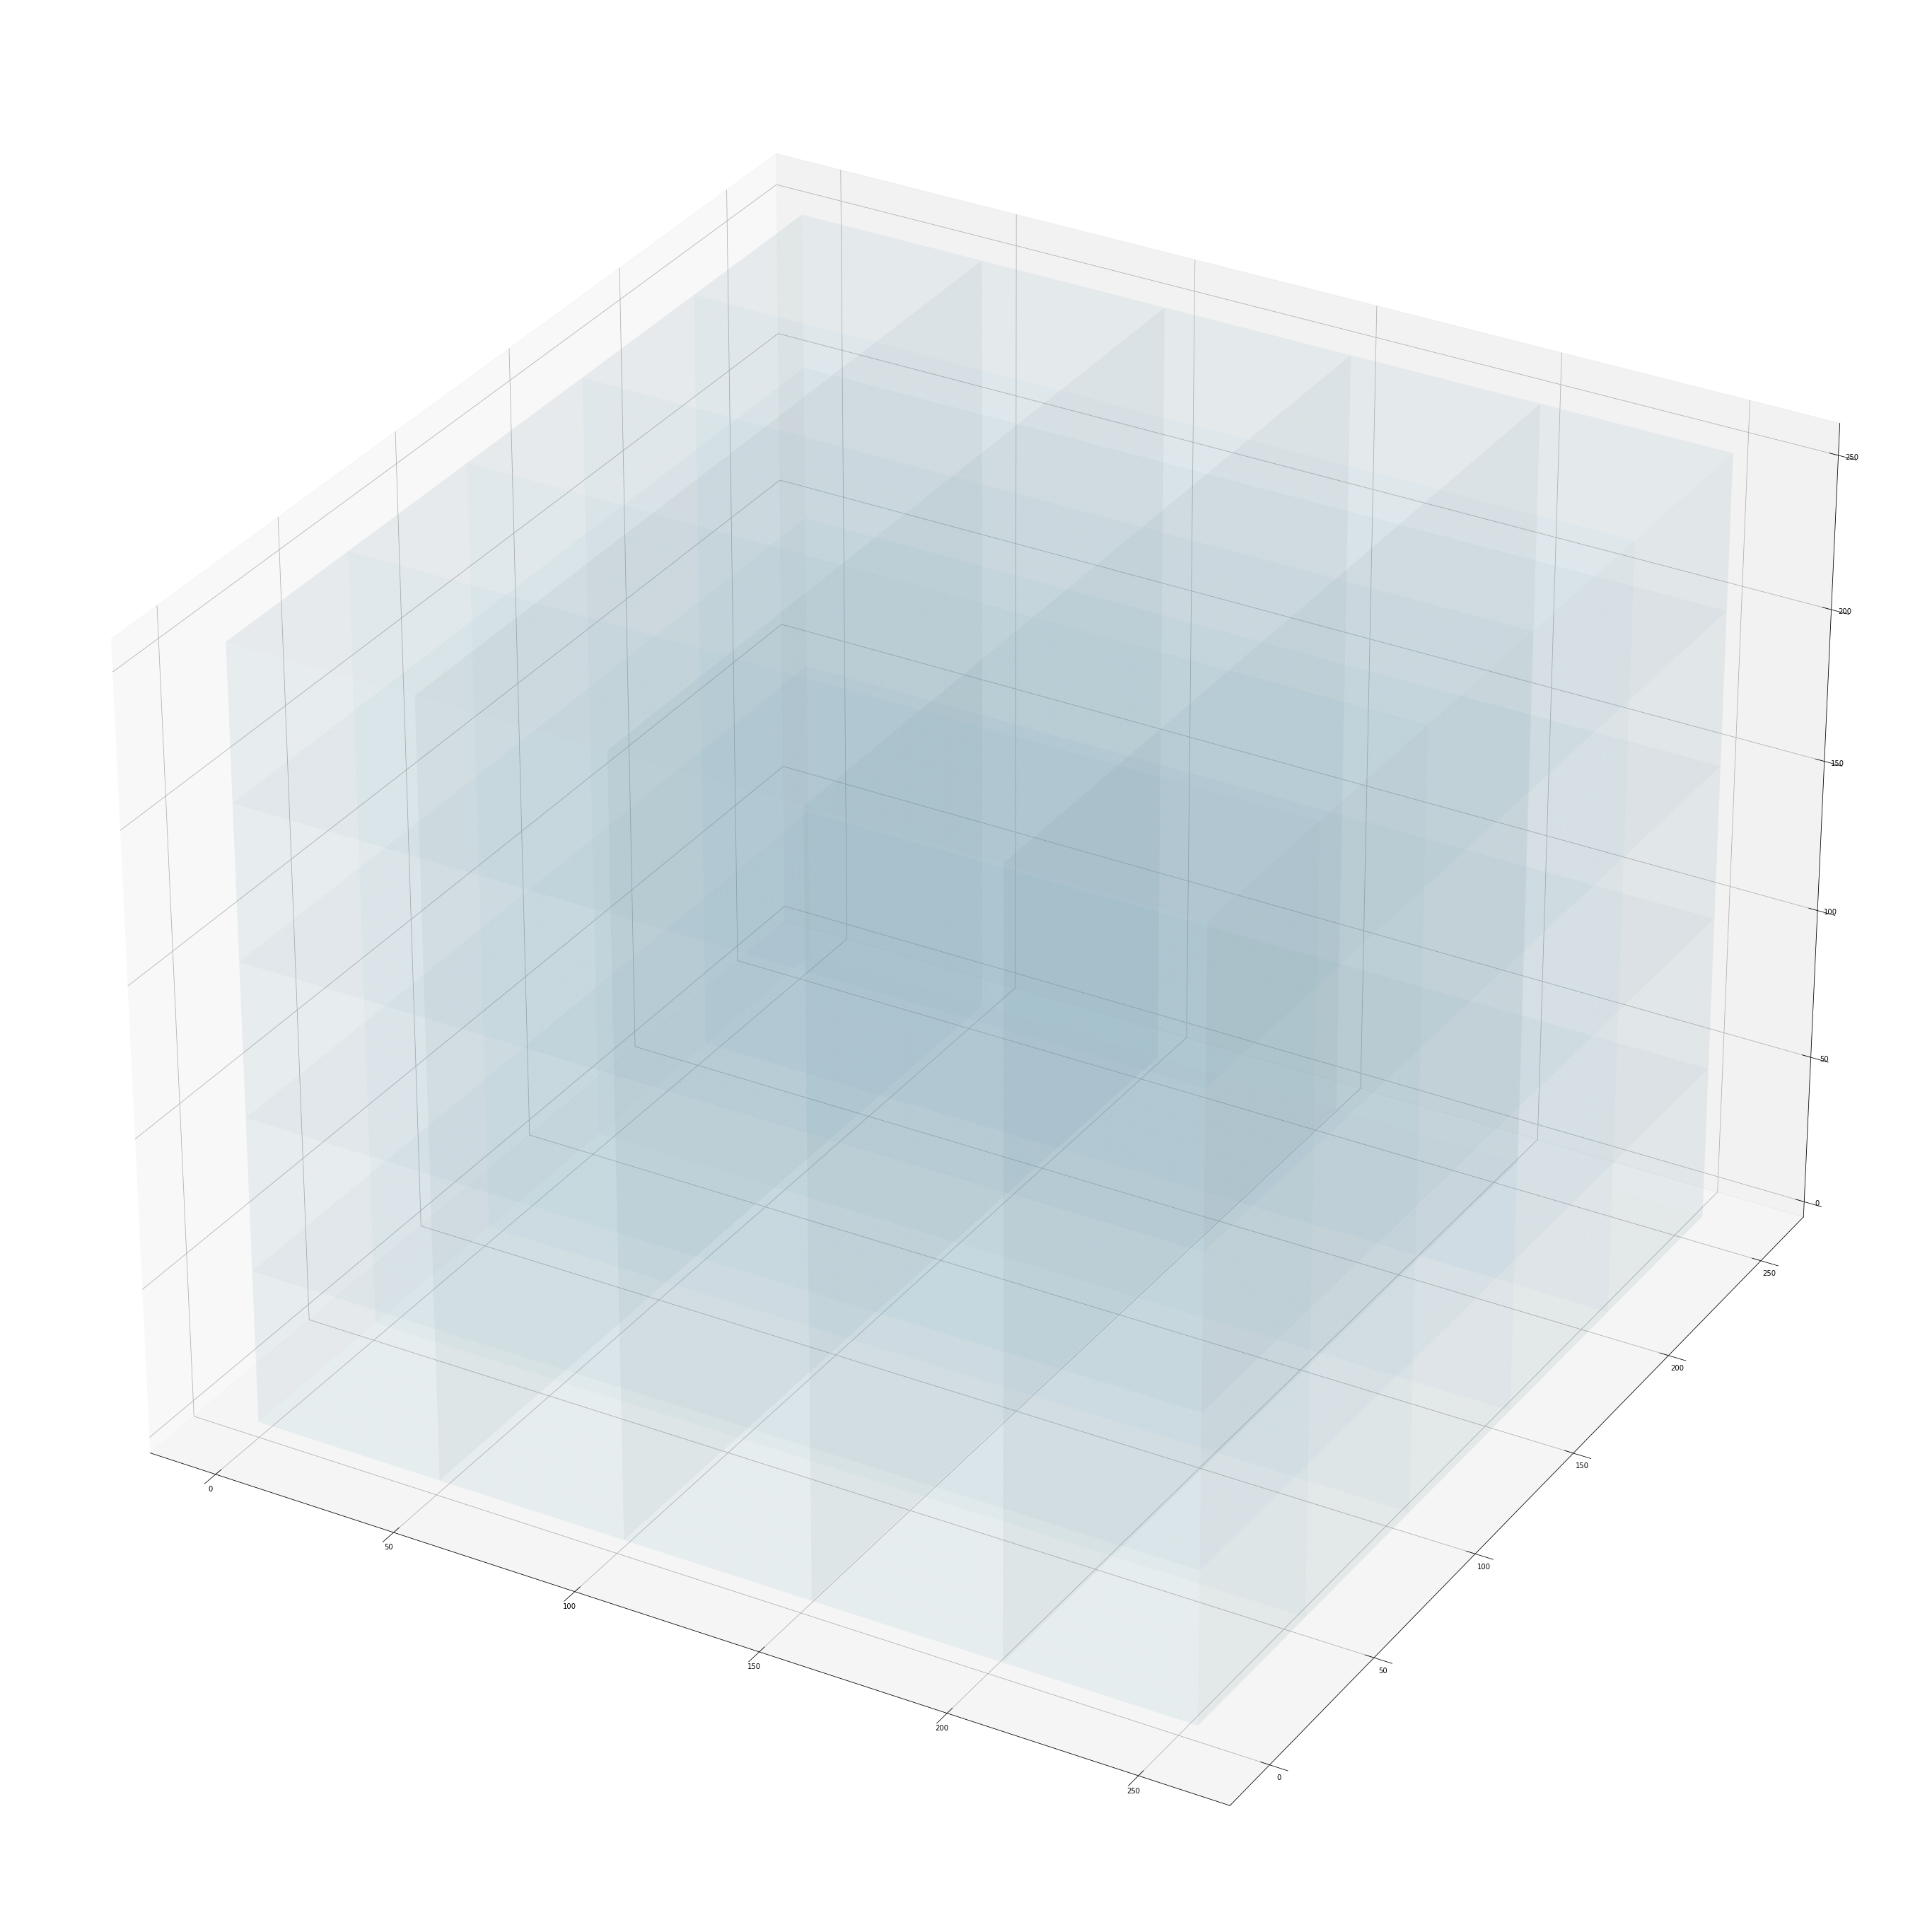

In [88]:
fig = plt.figure(figsize=(50,50))
ax = plt.axes(projection="3d")
def draw_block(ax, block_height: int=51, initialized: bool=True, alpha: float=0.2):
    if initialized == False:
        fig = plt.figure(figsize=(50,50))
        ax = plt.axes(projection="3d")

    space = int(255/block_height + 1)

    add = np.array([block_height for i in range(block_height+1)])
    x = np.linspace(0, 255, block_height+1)
    y = np.linspace(0, 255, block_height+1)
    X, Y = np.meshgrid(x, y)
    Z = 0 * X
    for i in range(space):
        ax.plot_surface(X,Y,Z+add*i, color="skyblue", alpha=alpha)


    x = np.linspace(0, 255, block_height+1)
    z = np.linspace(0, 255, block_height+1)
    X, Z = np.meshgrid(x, z)
    Y = 0 * X
    for i in range(space):
        ax.plot_surface(X,Y+add*i,Z, color="skyblue", alpha=alpha)

    y = np.linspace(0, 255, block_height+1)
    z = np.linspace(0, 255, block_height+1)
    Y, Z = np.meshgrid(y, z)
    X = 0 * Y
    for i in range(space):
        ax.plot_surface(X+add*i,Y,Z, color="skyblue", alpha=alpha)
    
draw_block(ax, alpha=0.05)

In [89]:
linear_pixel = list()
for i in pix.tolist():
    for j in i:
        linear_pixel.append(j)

r_data = list()
g_data = list()
b_data = list()
for i in linear_pixel:
    r_data.append(i[0])
    g_data.append(i[1])
    b_data.append(i[2])


fig = plt.figure(figsize=(50,50))
ax = plt.axes(projection="3d")
ax.set_xlabel("Red", fontsize=60)
ax.set_ylabel("Green", fontsize=60)
ax.set_zlabel("Blue", fontsize=60)

# Add Block Effects
draw_block(ax=ax, alpha=0.05)

# Set Font
ax.tick_params(axis='both', which='major', labelsize=40)
ax.tick_params(axis='both', which='minor', labelsize=40)
# Plot RGB Data
for i in range(len(r_data)):
    ax.scatter3D(r_data[i], g_data[i], b_data[i], color=[(r_data[i]/255,g_data[i]/255,b_data[i]/255)], s=70)

## Calculate Concentration per Block